<a href="https://colab.research.google.com/github/JohnWu777/Colab-python-class/blob/main/Final_MA%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 資料集輸入

In [2]:
%pip install pandas

In [3]:
import pandas as pd

# 讀取 Excel 檔案
df = pd.read_excel('Bike_data.xlsx')

# 選擇第 0 和第 1 列，並創建副本
data_raw = df.iloc[:, [0, 1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]].copy()

display(data_raw)

,ID,Distance,Time,Safe,Air,View,Cover,Light,Road,Rest,...,Save,Health,Fashion,Jam,Inspire,Comfort,Afford,Bag,Can,Recommend
0,1,5.0,12,4,3,3,2,3,3,4,...,4,4,4,4,4,4,4,4,4,4
1,2,32.0,40,3,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2,3,8.7,25,1,1,1,1,1,1,1,...,4,2,1,3,2,1,3,1,2,2
3,4,21.0,50,2,1,2,1,2,2,3,...,4,4,2,3,2,3,4,4,2,2
4,5,5.0,20,2,2,2,2,5,2,2,...,5,5,3,5,4,4,4,2,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,264,22.0,45,3,2,2,1,2,3,1,...,5,4,3,4,4,3,3,4,4,4
264,265,5.0,15,2,2,2,2,2,1,3,...,4,4,4,4,3,4,2,2,2,2
265,266,37.3,120,2,2,2,2,2,2,2,...,3,3,3,3,3,3,4,3,2,3
266,267,17.0,60,1,1,1,1,1,3,3,...,4,4,4,2,4,3,3,3,2,3


# Kmean（通勤時間,通勤距離）

,0
Distance,float64
Time,int64


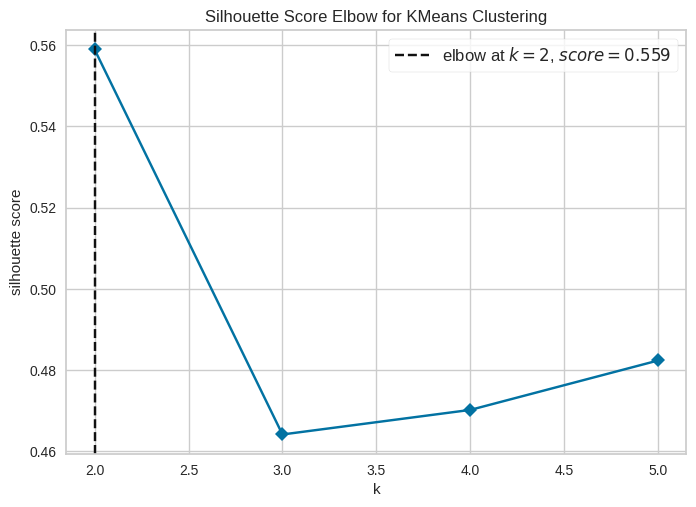

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [4]:
#確認分群適合組數
import pandas as pd
KM_raw = data_raw.copy()
KM=KM_raw[['Distance','Time']]
display(KM.dtypes)

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
KM_scaled= scaler.fit_transform(KM)
KM_scaled=pd.DataFrame(KM_scaled, columns=KM.columns)
KM_scaled.head()

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model=KMeans()
visualizer = KElbowVisualizer(model, k=(2,6),metric='silhouette',timings=False)
visualizer.fit(KM)
visualizer.show()

In [5]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 提取需要分群的列
KM_scaled = KM_raw[['Distance', 'Time']].copy()

# 进行 KMeans 分群，设为 2 群
kmeans_2 = KMeans(n_clusters=2, max_iter=10, n_init=1, random_state=1234)
kmeans_2.fit(KM_scaled)

# 将分群结果加入到 KM_scaled DataFrame 中
KM_scaled.loc[:, 'groups_2'] = kmeans_2.labels_

# 根据每个群的中心点的 'Distance' 值重新编号，最高的群设为1，最低的群设为2
centers = kmeans_2.cluster_centers_[:, 0]  # 取 'Distance' 列的中心点
sorted_indices = np.argsort(centers)       # 按 'Distance' 排序

# 创建一个映射，将原始标签重新映射为 1, 2(單位高命名為群組1，單位低命名為群組2)
label_mapping = {sorted_indices[0]: 2, sorted_indices[1]: 1}
KM_scaled.loc[:, 'groups_2'] = KM_scaled['groups_2'].map(label_mapping)

# 将 'groups_2' 转换为 'category' 类型
KM_scaled['groups_2'] = KM_scaled['groups_2'].astype('category')

# 将分群结果加入到原始数据中，并将列名设为 'Cluster'
KM_raw.loc[:, 'Cluster'] = KM_scaled['groups_2']

display(KM_raw)

<ipython-input-5-05c090c0b6b5>:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2 1 2 1 2 1 1 1 2 1 2 2 1 2 2 1 2 2 2 2 2 1 1 1 2 1 2 1 2 1 2 2 1 2 2 2 2
 1 2 1 2 2 2 1 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 1 2 2 2 2 1 2
 2 1 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 1 1 2 2 1 2 1 1 2 2 2 2 1 1 2 2 2 2 1 2
 2 2 2 2 2 1 2 2 2 2 2 1 2 1 1 1 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 1 2 2
 2 2 2 1 2 2 2 1 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 1 2 1 2 1 2
 2 2 2 2 1 2 1 2 2 2 2 1 1 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2
 1 2 2 1 2 2 1 2 2 2 2 2 2 1 2 2 2 1 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1
 1 2 2 2 1 2 1 1 1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  KM_scaled.loc[:, 'groups_2'] = KM_scaled['groups_2'].map(label_mapping)


,ID,Distance,Time,Safe,Air,View,Cover,Light,Road,Rest,...,Health,Fashion,Jam,Inspire,Comfort,Afford,Bag,Can,Recommend,Cluster
0,1,5.0,12,4,3,3,2,3,3,4,...,4,4,4,4,4,4,4,4,4,2
1,2,32.0,40,3,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,1
2,3,8.7,25,1,1,1,1,1,1,1,...,2,1,3,2,1,3,1,2,2,2
3,4,21.0,50,2,1,2,1,2,2,3,...,4,2,3,2,3,4,4,2,2,1
4,5,5.0,20,2,2,2,2,5,2,2,...,5,3,5,4,4,4,2,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,264,22.0,45,3,2,2,1,2,3,1,...,4,3,4,4,3,3,4,4,4,1
264,265,5.0,15,2,2,2,2,2,1,3,...,4,4,4,3,4,2,2,2,2,2
265,266,37.3,120,2,2,2,2,2,2,2,...,3,3,3,3,3,4,3,2,3,1
266,267,17.0,60,1,1,1,1,1,3,3,...,4,4,2,4,3,3,3,2,3,1


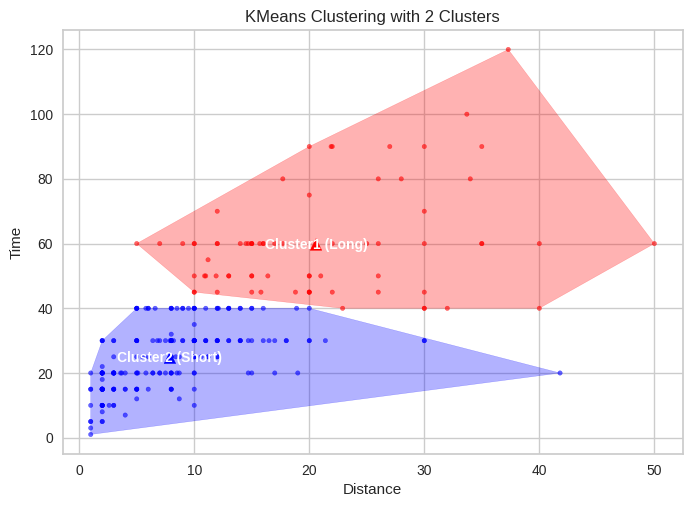

In [6]:
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import numpy as np

# 定義凸包顏色映射
colors = ['red', 'blue']

# 確保 'Cluster' 欄位是 category 型別
KM_raw['Cluster'] = KM_raw['Cluster'].astype('category')

# 根據 KM_raw['Cluster'] 的值來定義顏色
cluster_colors = KM_raw['Cluster'].map({1: 'red', 2: 'blue'})

# 繪製散點圖，使用 cluster_colors
plt.scatter(KM_raw['Distance'], KM_raw['Time'], c=cluster_colors, alpha=0.6, s=10)

# 繪製群中心
kmeans_2_centers = kmeans_2.cluster_centers_
cen_x = kmeans_2_centers[:, 0]  # 提取中心點的 'Distance'
cen_y = kmeans_2_centers[:, 1]  # 提取中心點的 'Time'
triangle_colors = ['blue', 'red']  # 交換三角形的顏色
plt.scatter(cen_x, cen_y, c=triangle_colors, marker='^', s=70)

# 繪製凸包和標籤
for i in KM_raw['Cluster'].cat.categories:
    points = KM_raw[KM_raw['Cluster'] == i][['Distance', 'Time']].values
    if len(points) >= 3:
        hull = ConvexHull(points)
        x_hull = np.append(points[hull.vertices, 0], points[hull.vertices, 0][0])
        y_hull = np.append(points[hull.vertices, 1], points[hull.vertices, 1][0])
        plt.fill(x_hull, y_hull, alpha=0.3, color=colors[i-1])

    # 添加群集名稱標籤
    label_x, label_y = cen_x[i-1], cen_y[i-1]
    if i == 1:
        plt.text(label_x, label_y, "Cluster2 (Short)", fontsize=10, ha='center', va='center', color='white', fontweight='bold')
    elif i == 2:
        plt.text(label_x, label_y, "Cluster1 (Long)", fontsize=10, ha='center', va='center', color='white', fontweight='bold')

plt.xlabel('Distance')
plt.ylabel('Time')
plt.title('KMeans Clustering with 2 Clusters')
plt.show()


# ANOVA(為了檢驗Kmeans分群結果)

KMeans 分群結果預覽:


,ID,Distance,Time,Safe,Air,View,Cover,Light,Road,Rest,...,Health,Fashion,Jam,Inspire,Comfort,Afford,Bag,Can,Recommend,Cluster
0,1,5.0,12,4,3,3,2,3,3,4,...,4,4,4,4,4,4,4,4,4,2
1,2,32.0,40,3,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,1
2,3,8.7,25,1,1,1,1,1,1,1,...,2,1,3,2,1,3,1,2,2,2
3,4,21.0,50,2,1,2,1,2,2,3,...,4,2,3,2,3,4,4,2,2,1
4,5,5.0,20,2,2,2,2,5,2,2,...,5,3,5,4,4,4,2,3,4,2



Shapiro-Wilk Normality Test:
Cluster 1: W-statistic=0.8486, p-value=0.0000
Cluster 1 數據不符合常態分佈
Cluster 2: W-statistic=0.9359, p-value=0.0000
Cluster 2 數據不符合常態分佈

Levene's Test for Homogeneity of Variances:
Levene-statistic=8.3429, p-value=0.0042
各組方差不相等，不滿足同質性假設

ANOVA Test:
F-statistic=457.9677, p-value=0.0000
ANOVA結果顯著，各群之間存在顯著差異

Tukey HSD Post-Hoc Test:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
     1      2 -35.0028   0.0 -38.2233 -31.7824   True
-----------------------------------------------------


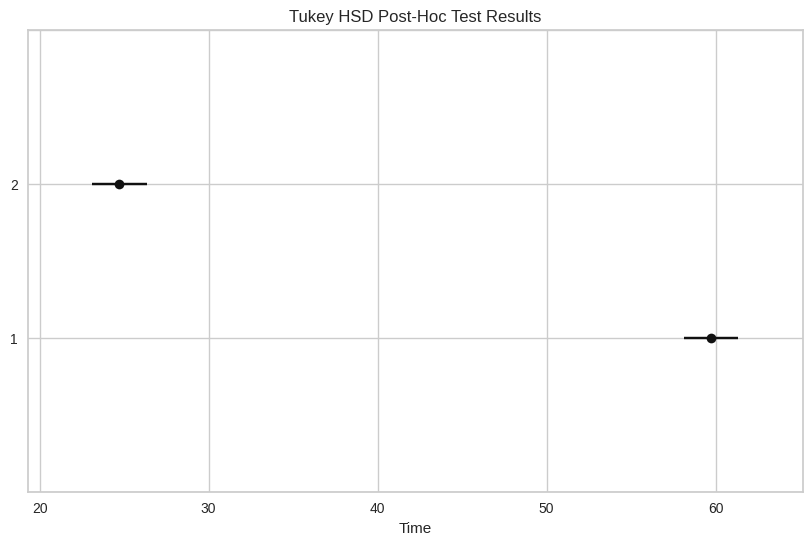

In [7]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.stats import shapiro, levene, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt


# 查看分群結果
print("KMeans 分群結果預覽:")
display(KM_raw.head())

# 準備分群數據
cluster_1 = KM_raw[KM_raw['Cluster'] == 1]['Time']
cluster_2 = KM_raw[KM_raw['Cluster'] == 2]['Time']

# 確保數據無缺失值
if cluster_1.isnull().any() or cluster_2.isnull().any():
    print("警告：數據存在缺失值，請先清理數據！")

# 1. 常態性檢驗（Shapiro-Wilk 檢驗）
print("\nShapiro-Wilk Normality Test:")
for i, cluster in enumerate([cluster_1, cluster_2]):
    if len(cluster) >= 3:
        stat, p = shapiro(cluster)
        print(f"Cluster {i + 1}: W-statistic={stat:.4f}, p-value={p:.4f}")
        if p > 0.05:
            print(f"Cluster {i + 1} 數據符合常態分佈")
        else:
            print(f"Cluster {i + 1} 數據不符合常態分佈")
    else:
        print(f"Cluster {i + 1} 數據不足 (<3)，無法進行 Shapiro-Wilk 檢驗")

# 2. 同質性檢驗（Levene's Test）
if len(cluster_1) >= 3 and len(cluster_2) >= 3:
    stat, p = levene(cluster_1, cluster_2)
    print("\nLevene's Test for Homogeneity of Variances:")
    print(f"Levene-statistic={stat:.4f}, p-value={p:.4f}")
    if p > 0.05:
        print("各組方差相等，滿足同質性假設")
    else:
        print("各組方差不相等，不滿足同質性假設")
else:
    print("\nLevene's Test 無法進行，因分組樣本不足")

# 3. ANOVA 分析
if len(cluster_1) >= 3 and len(cluster_2) >= 3:
    anova_stat, anova_p = f_oneway(cluster_1, cluster_2)
    print("\nANOVA Test:")
    print(f"F-statistic={anova_stat:.4f}, p-value={anova_p:.4f}")
    if anova_p < 0.05:
        print("ANOVA結果顯著，各群之間存在顯著差異")
    else:
        print("ANOVA結果不顯著，各群之間不存在顯著差異")

    # 4. 事後檢驗（Tukey HSD 檢驗）
    print("\nTukey HSD Post-Hoc Test:")
    tukey = pairwise_tukeyhsd(endog=KM_raw['Time'], groups=KM_raw['Cluster'], alpha=0.05)
    print(tukey)

    # 視覺化 Tukey 檢驗結果
    tukey.plot_simultaneous()
    plt.xlabel('Time')
    plt.title('Tukey HSD Post-Hoc Test Results')
    plt.show()
else:
    print("\nANOVA 和 Tukey HSD 檢驗無法進行，因分組樣本不足")

#對Kmeans分群結果進行ANOVA，檢驗分群結果顯著性，但不符合常態性和同質性，故使用使用welch_anova和Games-Howell 事後檢驗


Shapiro-Wilk Normality Test:
Cluster 1: W-statistic=0.9426, p-value=0.0026
Cluster 1 數據不符合常態分佈
Cluster 2: W-statistic=0.9359, p-value=0.0000
Cluster 2 數據不符合常態分佈

Levene's Test for Homogeneity of Variances:
Levene-statistic=1.3116, p-value=0.2531
各組方差相等，滿足同質性假設

ANOVA Test:
F-statistic=9.6033, p-value=0.0022
ANOVA結果顯著，各群之間存在顯著差異

Tukey HSD Post-Hoc Test:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
     1      2 -12.6975   0.0 -14.5797 -10.8152   True
-----------------------------------------------------


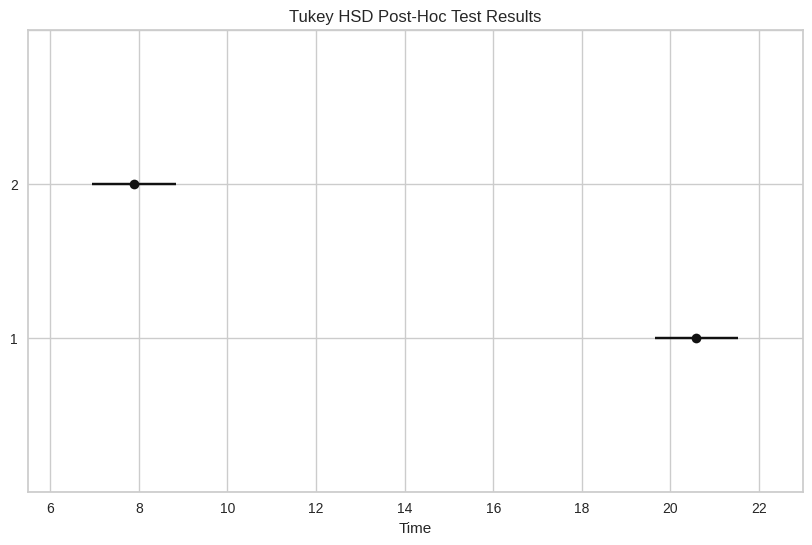

In [8]:
#Distance(ANOVA)
# 準備分群數據
cluster_1_Distance = KM_raw[KM_raw['Cluster'] == 1]['Distance']
cluster_2_Distance = KM_raw[KM_raw['Cluster'] == 2]['Time']

# 確保數據無缺失值
if cluster_1_Distance.isnull().any() or cluster_2_Distance.isnull().any():
    print("警告：數據存在缺失值，請先清理數據！")

# 1. 常態性檢驗（Shapiro-Wilk 檢驗）
print("\nShapiro-Wilk Normality Test:")
for i, cluster in enumerate([cluster_1_Distance, cluster_2_Distance]):
    if len(cluster) >= 3:
        stat, p = shapiro(cluster)
        print(f"Cluster {i + 1}: W-statistic={stat:.4f}, p-value={p:.4f}")
        if p > 0.05:
            print(f"Cluster {i + 1} 數據符合常態分佈")
        else:
            print(f"Cluster {i + 1} 數據不符合常態分佈")
    else:
        print(f"Cluster {i + 1} 數據不足 (<3)，無法進行 Shapiro-Wilk 檢驗")

# 2. 同質性檢驗（Levene's Test）
if len(cluster_1_Distance) >= 3 and len(cluster_2_Distance) >= 3:
    stat, p = levene(cluster_1_Distance, cluster_2_Distance)
    print("\nLevene's Test for Homogeneity of Variances:")
    print(f"Levene-statistic={stat:.4f}, p-value={p:.4f}")
    if p > 0.05:
        print("各組方差相等，滿足同質性假設")
    else:
        print("各組方差不相等，不滿足同質性假設")
else:
    print("\nLevene's Test 無法進行，因分組樣本不足")

# 3. ANOVA 分析
if len(cluster_1_Distance) >= 3 and len(cluster_2_Distance) >= 3:
    anova_stat, anova_p = f_oneway(cluster_1_Distance, cluster_2_Distance)
    print("\nANOVA Test:")
    print(f"F-statistic={anova_stat:.4f}, p-value={anova_p:.4f}")
    if anova_p < 0.05:
        print("ANOVA結果顯著，各群之間存在顯著差異")
    else:
        print("ANOVA結果不顯著，各群之間不存在顯著差異")

    # 4. 事後檢驗（Tukey HSD 檢驗）
    print("\nTukey HSD Post-Hoc Test:")
    tukey = pairwise_tukeyhsd(endog=KM_raw['Distance'], groups=KM_raw['Cluster'], alpha=0.05)
    print(tukey)

    # 視覺化 Tukey 檢驗結果
    tukey.plot_simultaneous()
    plt.xlabel('Time')
    plt.title('Tukey HSD Post-Hoc Test Results')
    plt.show()
else:
    print("\nANOVA 和 Tukey HSD 檢驗無法進行，因分組樣本不足")

In [9]:
# 因符合ANOVA顯著，但同質性和常態性不通過，故使用welch_anova和Games-Howell 事後檢驗
%pip install pingouin

import pingouin as pg

welch_anova_Distance = pg.welch_anova(data=KM_raw, dv='Distance', between='Cluster')
print(welch_anova_Distance)
welch_anova_Time = pg.welch_anova(data=KM_raw, dv='Time', between='Cluster')
print(welch_anova_Time)
#Games-Howell 事後檢驗
posthoc_Distance = pg.pairwise_gameshowell(data=KM_raw, dv='Distance', between='Cluster')
print(posthoc_Distance)
posthoc_Time = pg.pairwise_gameshowell(data=KM_raw, dv='Time', between='Cluster')
print(posthoc_Time)

#Welch's ANOVA 結果：兩次檢驗都表明分群之間存在顯著差異，且效果量很大
#Games-Howell 事後檢驗：兩兩比較結果顯示，群組 1 和群組 2 之間的差異極為顯著，且效果量大。(當中A代表分群1,而B代表分群2)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 8.2 MB/s eta 0:00:00
    Source  ddof1      ddof2           F         p-unc      np2
0  Cluster      1  92.619892  117.707422  3.505223e-18  0.39876
    Source  ddof1     ddof2           F         p-unc      np2
0  Cluster      1  90.87097  295.955794  2.484176e-30  0.63258
   A  B    mean(A)   mean(B)       diff        se          T         df  pval  \
0  1  2  20.584722  7.887245  12.697477  1.170349  10.849305  92.619892   0.0   

     hedges  
0  1.825233  
   A  B    mean(A)    mean(B)       diff       se          T        df  \
0  1  2  59.722222  24.719388  35.002834  2.03465  17.203366  90.87097   

           pval    hedges  
0  1.554312e-14  2.940784  


# PCA(選主成份因素)

In [10]:
# Choose variables from PCA_raw

PCA = KM_raw.iloc[:,[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]].copy()

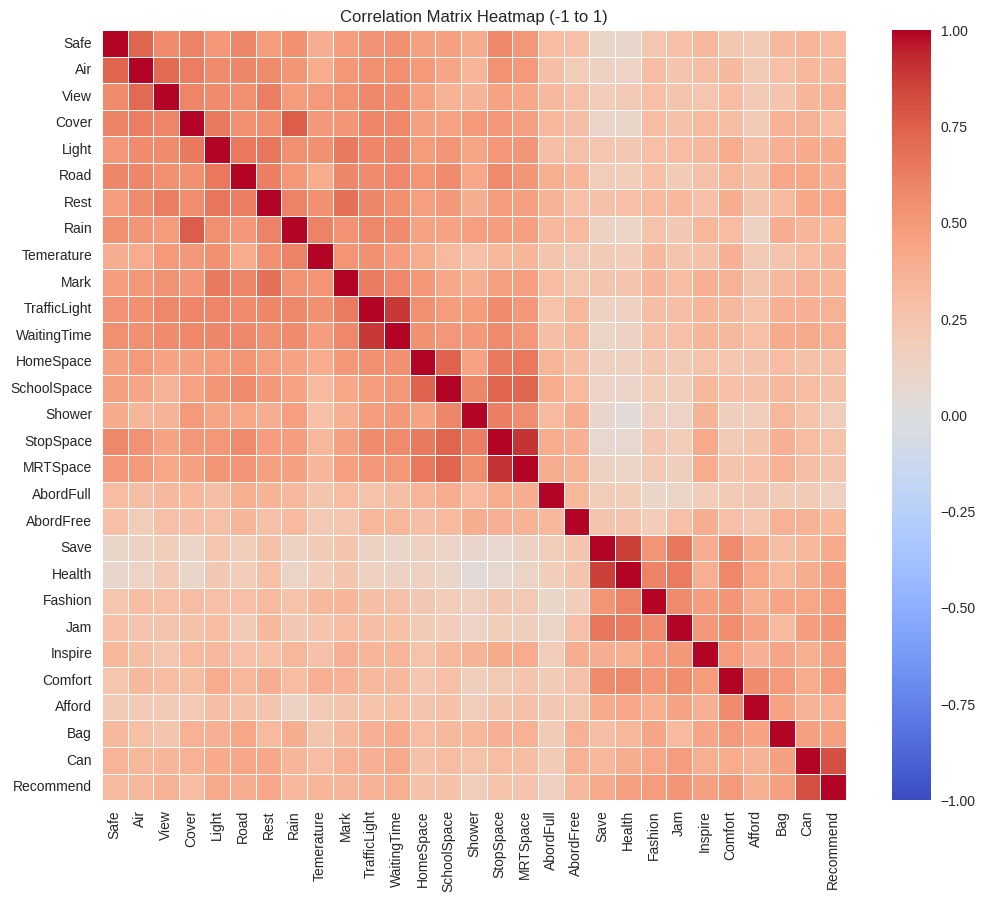

In [11]:
#相關矩陣（初步確認變量間的相關性）
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假設 df 是你的數據 DataFrame
# 計算相關矩陣
correlation_matrix = PCA.corr()

# 繪製熱力圖查看相關性
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidths=0.5)

# 添加標題
plt.title('Correlation Matrix Heatmap (-1 to 1)')

# 顯示圖形
plt.show()

#由圖可知，部分變數具強相關性，故做PCA做主成分萃取
#正相關的強關聯變項：
  #AbordFull ↔ AbordFree
  #MRTSpace ↔ StopSpace
  #Save ↔ Health
#負相關的強關聯變項：無

In [12]:
#PCA前確認KMO指標及bartlett檢驗
%pip install factor_analyzer
from factor_analyzer.factor_analyzer import calculate_kmo
from scipy.stats import bartlett

# Compute the KMO measure
kmo_all, kmo_model = calculate_kmo(PCA)
print("Overall KMO:", kmo_model)
print("KMO for each item:\n", kmo_all)
print("\n")

import pandas as pd

# 确保 PCA 仍然是 DataFrame 类型
PCA = pd.DataFrame(PCA)

# 计算 Bartlett's Test
from scipy.stats import bartlett

# Bartlett's Test 需要每列数据作为独立的参数
bartlett_test = bartlett(*[PCA.iloc[:, i] for i in range(PCA.shape[1])])

print("Bartlett's test statistic:", bartlett_test.statistic)
print("Bartlett's test p-value:", bartlett_test.pvalue)

#整體 KMO 值非常高（高於 0.90），表示整體數據非常適合進行因子分析
#P-value小，相關矩陣並非單位矩陣，變項之間存在顯著相關性，適合進行因子分析
#故存在多重共線性問題，可使用PCA進行主成份萃取

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42568 sha256=a1235ea35ce1e296dd61d8433377531b9d37e177386b8f3ecce5715e4e38d53c
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer
Overall KMO: 0.9136402600503953
KMO for each item:
 [0.93932318 0.90810203 0.93184251 0.92003185 0.95072424 0.95675324
 0.94418637 0.90739859 0.92022391 0.93722069 0.90645358 0.91016806
 0.92342518 0.91072832 0.93129176 0.89274557 0.88825082 0.93893455
 0.92256892 0.80855487 0.81998829 0.91812931 0.90249754 0.92848417
 0.92560979 0.93218489 0.93351137 0.87072057 0.87591057]


Bartlett's test statistic: 85.58419079803633
Bartlett's test p-value: 9.561861122844268e-08


/usr/local/lib/python3.10/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [13]:
#PCA(從29個因子萃取出主成份)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA

# Standardize the data
scaler = StandardScaler()
PCA_scaled = scaler.fit_transform(PCA)

# Perform PCA on scaled data(29個因子)
pca_29fac_scaled = sklearnPCA(n_components=29)
pca_29fac_scaled.fit_transform(PCA_scaled)

# Eigenvalues / SS loadings
eigenvalues_29fac = pca_29fac_scaled.explained_variance_
print("Eigenvalues:", eigenvalues_29fac,round(3))
print("\n")

# Compute weighted loadings/ standardized loadings
loadings_29fac = pca_29fac_scaled.components_.T* np.sqrt(pca_29fac_scaled.explained_variance_)

# Create a DataFrame for weighted loadings/ standardized loadings
loadings_29fac_df = pd.DataFrame(loadings_29fac, columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11", "PC12", "PC13", "PC14", "PC15", "PC16", "PC17", "PC18", "PC19", "PC20", "PC21", "PC22", "PC23", "PC24", "PC25", "PC26", "PC27", "PC28", "PC29"], index=PCA.columns)
print("standardized loadings:\n", loadings_29fac_df.round(3),"\n")

#得知特徵值大於1(Kaiser準則)的主成份有PC1,PC2,PC3,PC4

Eigenvalues: [12.08356107  3.58287206  1.65686444  1.14336275  0.94244859  0.91999227
  0.8560797   0.79855235  0.70500815  0.62003718  0.5739258   0.54887861
  0.53690526  0.47981043  0.40395287  0.40018572  0.37073367  0.35776088
  0.33808499  0.30064509  0.28732859  0.23768376  0.20175193  0.17592353
  0.16185199  0.14121704  0.11224308  0.09437453  0.0765779 ] 3


standardized loadings:
                 PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9  \
Safe          0.702 -0.247 -0.109  0.047 -0.026 -0.270  0.350  0.161  0.069   
Air           0.716 -0.221 -0.260 -0.099 -0.054 -0.345  0.268  0.179  0.067   
View          0.704 -0.164 -0.334 -0.120  0.131 -0.172  0.125  0.039  0.183   
Cover         0.742 -0.241 -0.221  0.071  0.020  0.140  0.222  0.189 -0.134   
Light         0.771 -0.125 -0.191 -0.058 -0.014  0.023 -0.157  0.005 -0.090   
Road          0.756 -0.182 -0.046 -0.006  0.143 -0.188 -0.142  0.082 -0.028   
Rest          0.762 -0.087 -0.260 -0.157  0.145  0.0

In [14]:
# 主成份負載率（所選主成份對因子的反應）
import numpy as np
#Step1: Calculate communalities(sum of squared loadings for each variable across all principal components)
communalities_29fac = np.sum(loadings_29fac_df**2, axis=1)

#Step2: Calculate uniqueness (1-communality for each variable)
uniqueness_29fac = 1 - communalities_29fac

#Step3: Combine communalities and uniqueness into the loadings dataframe
loadings_29fac_df['Communalities'] = communalities_29fac
loadings_29fac_df['Uniqueness'] = uniqueness_29fac

# Output the updata loadings dataframe(省略過小值)
print(loadings_29fac_df.round(3))

#PC1 主要代表安全性和交通便利性。主要反映： 安全性、便利性、交通設施 等相關特徵
#PC2 主要反映健康、節省和時尚相關特徵。主要反應： 節省、健康、時尚、擁堵感受 等特徵
#PC3 主要關注空間條件。主要反應：空間適應性與場所條件
#PC4 關聯攜帶便利性和推薦意願。主要反應： 攜帶便利性和推薦意願

                PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9  \
Safe          0.702 -0.247 -0.109  0.047 -0.026 -0.270  0.350  0.161  0.069   
Air           0.716 -0.221 -0.260 -0.099 -0.054 -0.345  0.268  0.179  0.067   
View          0.704 -0.164 -0.334 -0.120  0.131 -0.172  0.125  0.039  0.183   
Cover         0.742 -0.241 -0.221  0.071  0.020  0.140  0.222  0.189 -0.134   
Light         0.771 -0.125 -0.191 -0.058 -0.014  0.023 -0.157  0.005 -0.090   
Road          0.756 -0.182 -0.046 -0.006  0.143 -0.188 -0.142  0.082 -0.028   
Rest          0.762 -0.087 -0.260 -0.157  0.145  0.003 -0.139 -0.118 -0.108   
Rain          0.719 -0.223 -0.202  0.089  0.048  0.329  0.141  0.072 -0.269   
Temerature    0.624 -0.060 -0.353 -0.081 -0.014  0.360 -0.123 -0.050 -0.176   
Mark          0.734 -0.089 -0.226 -0.146 -0.057  0.114 -0.159 -0.137  0.001   
TrafficLight  0.773 -0.208 -0.163  0.118 -0.149  0.161 -0.138 -0.130  0.383   
WaitingTime   0.770 -0.210 -0.107  0.167 -0.125  0.1

In [15]:
# 累計解釋力(PC1+PC2+PC3+PC4可解釋所有因子的63%)
# Proportional variance (explained variance ratio for each principal component)
proportional_variance_29fac = pca_29fac_scaled.explained_variance_ratio_

# Cumulative variance (cumulative sum of explained variance ratios)
cumulative_variance_29fac = np.cumsum(proportional_variance_29fac)

# Create a DataFrame where PC1-PC29 are rows with columns for proportional and cumulative variance
variance_df = pd.DataFrame({
    'Proportional Variance': proportional_variance_29fac,
    'Cumulative Variance': cumulative_variance_29fac
}, index=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11", "PC12", "PC13", "PC14", "PC15", "PC16", "PC17", "PC18", "PC19", "PC20", "PC21", "PC22", "PC23", "PC24", "PC25", "PC26", "PC27", "PC28", "PC29"])

# Print the DataFrame rounded to 3 decimal places(省略過小值)
print(variance_df.round(3))

      Proportional Variance  Cumulative Variance
PC1                   0.415                0.415
PC2                   0.123                0.538
PC3                   0.057                0.595
PC4                   0.039                0.634
PC5                   0.032                0.667
PC6                   0.032                0.698
PC7                   0.029                0.728
PC8                   0.027                0.755
PC9                   0.024                0.779
PC10                  0.021                0.801
PC11                  0.020                0.820
PC12                  0.019                0.839
PC13                  0.018                0.858
PC14                  0.016                0.874
PC15                  0.014                0.888
PC16                  0.014                0.902
PC17                  0.013                0.915
PC18                  0.012                0.927
PC19                  0.012                0.939
PC20                

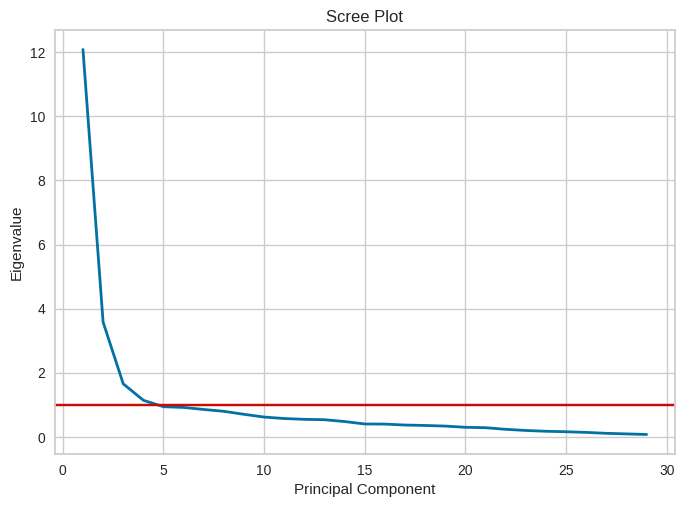

In [16]:
#陡坡圖(視覺化Kaiser準則)
import matplotlib.pyplot as plt

# Plot Scree Plot
plt.plot(range(1, 30), pca_29fac_scaled.explained_variance_, linewidth=2)
plt.axhline(y=1, color='r', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

#觀察特徵值（Eigenvalues）隨著主成分數量的變化，可以看到以下特徵：
#第一主成分 (PC1) 的特徵值明顯最高，約為 12。
#第二主成分 (PC2) 和 第三主成分 (PC3) 的特徵值也大於 1，分別約為 3.5 和 1.7。
#第四主成分 (PC4) 的特徵值約為 1.1，仍略高於紅色的水平線（特徵值 = 1）。
#從 第五主成分 (PC5) 開始，特徵值低於 1，變化趨於平緩，並且逐漸接近紅色的水平線 (故不選PC5)

In [17]:
#獲取PC1至PC4權重
# Perform PCA on sclaed data
pca_4fac_scaled = sklearnPCA(n_components=4)
pca_4fac_scaled.fit_transform(PCA_scaled)

# Standardized wieghts (principal component loadings)
loadings_scaled_4fac = pca_4fac_scaled.components_
display("Standardized weights:\n", PCA.columns, "\n", loadings_scaled_4fac.round(3))

'Standardized weights:\n'

Index(['Safe', 'Air', 'View', 'Cover', 'Light', 'Road', 'Rest', 'Rain',
       'Temerature', 'Mark', 'TrafficLight', 'WaitingTime', 'HomeSpace',
       'SchoolSpace', 'Shower', 'StopSpace', 'MRTSpace', 'AbordFull',
       'AbordFree', 'Save', 'Health', 'Fashion', 'Jam', 'Inspire', 'Comfort',
       'Afford', 'Bag', 'Can', 'Recommend'],
      dtype='object')

'\n'

array([[ 0.202,  0.206,  0.202,  0.213,  0.222,  0.218,  0.219,  0.207,
         0.18 ,  0.211,  0.222,  0.222,  0.197,  0.199,  0.174,  0.212,
         0.205,  0.134,  0.142,  0.117,  0.119,  0.15 ,  0.147,  0.165,
         0.166,  0.135,  0.168,  0.175,  0.173],
       [-0.131, -0.117, -0.087, -0.127, -0.066, -0.096, -0.046, -0.118,
        -0.032, -0.047, -0.11 , -0.111, -0.14 , -0.15 , -0.153, -0.18 ,
        -0.152, -0.06 ,  0.05 ,  0.379,  0.398,  0.286,  0.33 ,  0.178,
         0.283,  0.229,  0.134,  0.178,  0.233],
       [-0.084, -0.202, -0.26 , -0.172, -0.149, -0.036, -0.202, -0.157,
        -0.274, -0.175, -0.126, -0.083,  0.183,  0.318,  0.266,  0.321,
         0.336,  0.198,  0.273,  0.043,  0.022, -0.053, -0.028,  0.199,
        -0.017,  0.16 ,  0.151, -0.044, -0.083],
       [ 0.043, -0.092, -0.113,  0.066, -0.054, -0.006, -0.147,  0.083,
        -0.076, -0.136,  0.11 ,  0.156, -0.2  , -0.139,  0.096, -0.033,
        -0.098, -0.288,  0.241, -0.339, -0.284, -0.033, -0.06

In [18]:
#生成加權變數data_PC=data_raw*(PC)
import pandas as pd
import numpy as np

# 欄位名稱
columns = ['Safe', 'Air', 'View', 'Cover', 'Light', 'Road', 'Rest', 'Rain',
           'Temerature', 'Mark', 'TrafficLight', 'WaitingTime', 'HomeSpace',
           'SchoolSpace', 'Shower', 'StopSpace', 'MRTSpace', 'AbordFull',
           'AbordFree', 'Save', 'Health', 'Fashion', 'Jam', 'Inspire',
           'Comfort', 'Afford', 'Bag', 'Can', 'Recommend']

# 權重矩陣 (PC1, PC2, PC3, PC4)
weights = np.array([[ 0.202,  0.206,  0.202,  0.213,  0.222,  0.218,  0.219,  0.207,
                      0.18 ,  0.211,  0.222,  0.222,  0.197,  0.199,  0.174,  0.212,
                      0.205,  0.134,  0.142,  0.117,  0.119,  0.15 ,  0.147,  0.165,
                      0.166,  0.135,  0.168,  0.175,  0.173],
                    [-0.131, -0.117, -0.087, -0.127, -0.066, -0.096, -0.046, -0.118,
                     -0.032, -0.047, -0.11 , -0.111, -0.14 , -0.15 , -0.153, -0.18 ,
                     -0.152, -0.06 ,  0.05 ,  0.379,  0.398,  0.286,  0.33 ,  0.178,
                      0.283,  0.229,  0.134,  0.178,  0.233],
                    [-0.084, -0.202, -0.26 , -0.172, -0.149, -0.036, -0.202, -0.157,
                     -0.274, -0.175, -0.126, -0.083,  0.183,  0.318,  0.266,  0.321,
                      0.336,  0.198,  0.273,  0.043,  0.022, -0.053, -0.028,  0.199,
                     -0.017,  0.16 ,  0.151, -0.044, -0.083],
                    [ 0.043, -0.092, -0.113,  0.066, -0.054, -0.006, -0.147,  0.083,
                     -0.076, -0.136,  0.11 ,  0.156, -0.2  , -0.139,  0.096, -0.033,
                     -0.098, -0.288,  0.241, -0.339, -0.284, -0.033, -0.064,  0.16 ,
                     -0.096, -0.024,  0.337,  0.422,  0.363]])

# 生成示例的 data_raw 數據框，有 268 條數據
np.random.seed(0)
data_raw = pd.DataFrame(np.random.rand(268, len(columns)), columns=columns)

# 計算 PC1, PC2, PC3, PC4 乘以 data_raw 的各自權重
data_PC = np.dot(data_raw, weights.T)

# 結果數據框，並命名列
data_PC = pd.DataFrame(data_PC, columns=['PC1', 'PC2', 'PC3', 'PC4'])

# 顯示結果
print(data_PC)

from IPython.display import display
# 將 KM_raw 與 data_PC 合併成新的資料集 data_new
data_new = pd.concat([KM_raw, data_PC], axis=1)
# 顯示合併後的結果
display(data_new)


          PC1       PC2       PC3       PC4
0    3.032429  0.781737 -0.205209 -0.233966
1    2.509784  0.088946 -0.108113 -0.166544
2    2.170262 -0.128384  0.629406  0.168946
3    2.663712  0.725950  0.277176 -0.204254
4    3.016403  0.714858 -0.360342  0.010054
..        ...       ...       ...       ...
263  2.914609  0.116607  0.211635  0.300951
264  2.140899  0.823308  0.025138 -0.508852
265  2.424848 -0.488167  0.255073 -0.264470
266  2.524107 -0.192017  0.478410 -0.176644
267  2.597895  0.359917  0.256783 -0.153936

[268 rows x 4 columns]


,ID,Distance,Time,Safe,Air,View,Cover,Light,Road,Rest,...,Comfort,Afford,Bag,Can,Recommend,Cluster,PC1,PC2,PC3,PC4
0,1,5.0,12,4,3,3,2,3,3,4,...,4,4,4,4,4,2,3.032429,0.781737,-0.205209,-0.233966
1,2,32.0,40,3,2,2,2,2,2,2,...,2,2,2,2,2,1,2.509784,0.088946,-0.108113,-0.166544
2,3,8.7,25,1,1,1,1,1,1,1,...,1,3,1,2,2,2,2.170262,-0.128384,0.629406,0.168946
3,4,21.0,50,2,1,2,1,2,2,3,...,3,4,4,2,2,1,2.663712,0.725950,0.277176,-0.204254
4,5,5.0,20,2,2,2,2,5,2,2,...,4,4,2,3,4,2,3.016403,0.714858,-0.360342,0.010054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,264,22.0,45,3,2,2,1,2,3,1,...,3,3,4,4,4,1,2.914609,0.116607,0.211635,0.300951
264,265,5.0,15,2,2,2,2,2,1,3,...,4,2,2,2,2,2,2.140899,0.823308,0.025138,-0.508852
265,266,37.3,120,2,2,2,2,2,2,2,...,3,4,3,2,3,1,2.424848,-0.488167,0.255073,-0.264470
266,267,17.0,60,1,1,1,1,1,3,3,...,3,3,3,2,3,1,2.524107,-0.192017,0.478410,-0.176644


<Axes: >

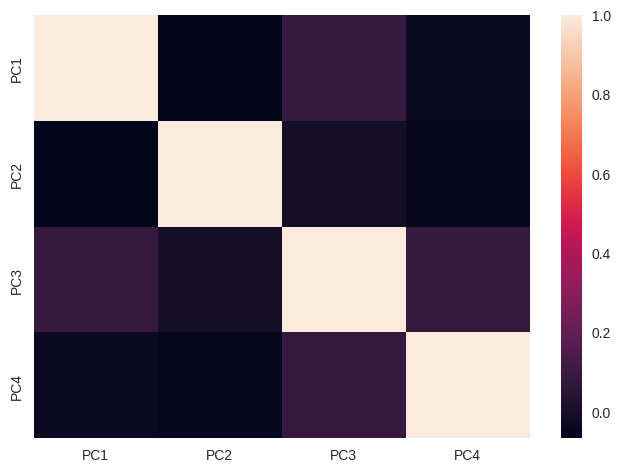

In [19]:
#相關矩陣（視覺化證明主成份之間無相關性）
import seaborn as sns
COR = data_new.loc[:,['PC1','PC2','PC3','PC4']]
cormat = COR.corr()
sns.heatmap(cormat)

MANOVA

In [20]:
#BOX_M(同質性檢驗)
import pingouin as pg
#  'Cluster' 是分組變量，'PC1','PC2','PC3' 和 'PC4' 是連續變量
# 執行 Box's M test
box_m_test = pg.box_m(data_new, dvs=['PC1','PC2','PC3','PC4'], group='Cluster')
# 顯示結果
print(box_m_test)
#同質性通過

          Chi2    df     pval  equal_cov
box  13.919185  10.0  0.17671       True


In [21]:
# 多元常態分佈檢驗（使用Henze-Zirkler test）
from pingouin import multivariate_normality as mn
# 拆分性別資料集（Cluster1、Cluster2）
FIX_C = data_new.groupby('Cluster')
Cluster1_data = FIX_C.get_group(1)
Cluster2_data = FIX_C.get_group(2)
# （男、女）多元常態分佈檢驗
Cluster1_mntest = mn(Cluster1_data[['PC1','PC2','PC3','PC4']],alpha=0.5)
Cluster2_mntest = mn(Cluster2_data[['PC1','PC2','PC3','PC4']],alpha=0.5)
print(Cluster1_mntest)
print(Cluster2_mntest)
#常態性通過

HZResults(hz=0.7774048442007615, pval=0.5208477859063572, normal=True)
HZResults(hz=0.8208644596237489, pval=0.6024188585000791, normal=True)


<ipython-input-21-1997d59bb80e>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  FIX_C = data_new.groupby('Cluster')


In [22]:
# 輸入statsmodels裡的MANOVA套件
from statsmodels.multivariate.manova import MANOVA
# 建立MANOV方程式
formula = 'PC1+PC2+PC3+PC4~Cluster'
# 執行MANOVA
manova_model = MANOVA.from_formula(formula,data=data_new)
manova_results = manova_model.mv_test()
# 輸出MANOVA結果
print(manova_results)

#截距 對多變量結果有顯著影響（p < 0.001）。
#Cluster（聚類分組）對多變量結果無顯著影響（p = 0.6488），表示分組之間在這些主成分上沒有明顯差異

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0444 4.0000 263.0000 1416.7287 0.0000
         Pillai's trace  0.9556 4.0000 263.0000 1416.7287 0.0000
 Hotelling-Lawley trace 21.5472 4.0000 263.0000 1416.7287 0.0000
    Roy's greatest root 21.5472 4.0000 263.0000 1416.7287 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
           Cluster         Value  Num DF  Den DF  F Value Pr > F
----------------------------------------------------------------
             Wilks' lambda 0.9907 4.0000 263.0000  0.6197 0.6488
            Pillai's trace 0.0093 4.0000 263.

LDA（MANOVA的事後比較）：由於MANOVA不顯著故LDA應該預測能力不佳

In [23]:
# Choose variables(columns) and save as DDA
columns_to_select=[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]
DDA = data_new.iloc[:, columns_to_select]


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
X = DDA[['Safe', 'Air', 'View', 'Cover', 'Light', 'Road', 'Rest', 'Rain',
           'Temerature', 'Mark', 'TrafficLight', 'WaitingTime', 'HomeSpace',
           'SchoolSpace', 'Shower', 'StopSpace', 'MRTSpace', 'AbordFull',
           'AbordFree', 'Save', 'Health', 'Fashion', 'Jam', 'Inspire',
           'Comfort', 'Afford', 'Bag', 'Can', 'Recommend']]
y = DDA.loc[:,"Cluster"]

# Inotoalize and fit the LDA model
lda_model = LDA()
lda_model.fit(X,y)

# Get the canonical variables
canonical_vars = lda_model.transform(X)

display(DDA)

,Safe,Air,View,Cover,Light,Road,Rest,Rain,Temerature,Mark,...,Health,Fashion,Jam,Inspire,Comfort,Afford,Bag,Can,Recommend,Cluster
0,4,3,3,2,3,3,4,2,3,3,...,4,4,4,4,4,4,4,4,4,2
1,3,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,1
2,1,1,1,1,1,1,1,1,3,1,...,2,1,3,2,1,3,1,2,2,2
3,2,1,2,1,2,2,3,1,3,3,...,4,2,3,2,3,4,4,2,2,1
4,2,2,2,2,5,2,2,2,3,2,...,5,3,5,4,4,4,2,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,3,2,2,1,2,3,1,1,2,3,...,4,3,4,4,3,3,4,4,4,1
264,2,2,2,2,2,1,3,3,3,2,...,4,4,4,3,4,2,2,2,2,2
265,2,2,2,2,2,2,2,2,2,3,...,3,3,3,3,3,4,3,2,3,1
266,1,1,1,1,1,3,3,2,3,2,...,4,4,2,4,3,3,3,2,3,1


In [24]:
#LDA的判別函數
# Display the canonical variables
print("Canonical Scores:")
print(canonical_vars[:6],"...","\n")

# Inspect the intercept, coefficients and explained variance ratio
print("Intercept of 1 canonical functions:")
print(lda_model.intercept_,"\n")

print("Coefficients of 1 canonical functions:")
print(lda_model.coef_,"\n")

print("Explained Variance Ratio:")
print(lda_model.explained_variance_ratio_,"\n")

Canonical Scores:
[[-0.4721453 ]
 [ 0.89580587]
 [ 0.69563809]
 [-1.60789572]
 [ 1.05673077]
 [ 0.7749437 ]] ... 

Intercept of 1 canonical functions:
[2.27130737] 

Coefficients of 1 canonical functions:
[[ 0.21708088  0.29760637  0.07326405 -0.84752855  0.55719617 -0.35049032
  -0.3787577   0.90830191 -0.13394939 -0.02966961  0.07035964 -0.18746413
   0.31285957 -0.18905461  0.23384566  0.59624422 -0.83574631 -0.02987835
  -0.01166734 -0.24103461  0.11510619 -0.38573241  0.33775077  0.13228061
   0.11751871 -0.31614775  0.10590109 -0.33140987 -0.06419302]] 

Explained Variance Ratio:
[1.] 



In [25]:
#預測結果（Predicted_Class）
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions
lda_values = lda_model.predict(X)
lda_proba = lda_model.predict_proba(X)

# Create a DataFrame to store the predictions
lda_results = pd.DataFrame({
    'Predicted_Class': lda_values,
    'Predicted_Probability': [prob.round(3) for prob in lda_proba]#Probabilities for each class
})

# Add the predictions tp original DataFrame
DDA_with_predictions = DDA.copy()
DDA_with_predictions = pd.concat([DDA_with_predictions, lda_results],axis=1)

# Display the first few rows
print("\nFirst few rows of predicitons:")
print(DDA_with_predictions.head(10))


First few rows of predicitons:
   Safe  Air  View  Cover  Light  Road  Rest  Rain  Temerature  Mark  ...  \
0     4    3     3      2      3     3     4     2           3     3  ...   
1     3    2     2      2      2     2     2     2           2     2  ...   
2     1    1     1      1      1     1     1     1           3     1  ...   
3     2    1     2      1      2     2     3     1           3     3  ...   
4     2    2     2      2      5     2     2     2           3     2  ...   
5     3    3     3      3      3     3     3     3           3     3  ...   
6     2    2     2      2      2     2     2     2           3     2  ...   
7     1    1     2      2      3     3     4     3           3     2  ...   
8     2    1     3      1      2     1     2     2           1     3  ...   
9     4    4     3      3      4     4     4     3           3     3  ...   

   Jam  Inspire  Comfort  Afford  Bag  Can  Recommend  Cluster  \
0    4        4        4       4    4    4          4 

Cluster 1 的數量: 72
Cluster 2 的數量: 196


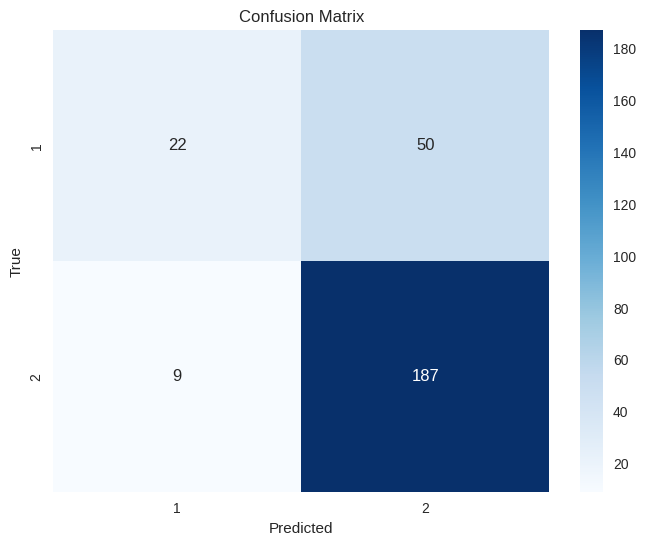


Accuracy Rate:
0.7798507462686567


In [26]:
#原始資料的Cluster分群情況
cluster_counts = data_new['Cluster'].value_counts()
print(f"Cluster 1 的數量: {cluster_counts.get(1, 0)}")
print(f"Cluster 2 的數量: {cluster_counts.get(2, 0)}")
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Compute confusion matrix
conf_atrix = confusion_matrix(y, lda_values, labels=lda_model.classes_)

# Compute accuracy rate
accuracy = accuracy_score(y, lda_values)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_atrix, annot=True, fmt='d', cmap='Blues', xticklabels=lda_model.classes_, yticklabels=lda_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print("\nAccuracy Rate:")
print(accuracy)
#雖然Accuracy Rate:0.78 有較高預測力，但多數Cluster1樣本被分到Cluster2,故該LDA並不能有效作為預測標準

隨機森林（了解LDA中的重要特徵）

特徵的重要性： {'Safe': 0.04469122213744441, 'Air': 0.02658005574119278, 'View': 0.026923314665576476, 'Cover': 0.031741040052176615, 'Light': 0.03376284896774326, 'Road': 0.05120736525595798, 'Rest': 0.03517770458982428, 'Rain': 0.033292999687625814, 'Temerature': 0.03391454783985122, 'Mark': 0.04044303192226814, 'TrafficLight': 0.029033510055161034, 'WaitingTime': 0.023390845260165008, 'HomeSpace': 0.03317899387704767, 'SchoolSpace': 0.028386431382249434, 'Shower': 0.03277707059191733, 'StopSpace': 0.030661706169492126, 'MRTSpace': 0.02869068315736029, 'AbordFull': 0.04592567269930967, 'AbordFree': 0.041871724049675624, 'Save': 0.03886447516570646, 'Health': 0.03313077249373172, 'Fashion': 0.033646297954926616, 'Jam': 0.039301369035269325, 'Inspire': 0.03100692110964577, 'Comfort': 0.03167441584045189, 'Afford': 0.03583212884996669, 'Bag': 0.03033009439979656, 'Can': 0.043138592198250204, 'Recommend': 0.03142416485021553}


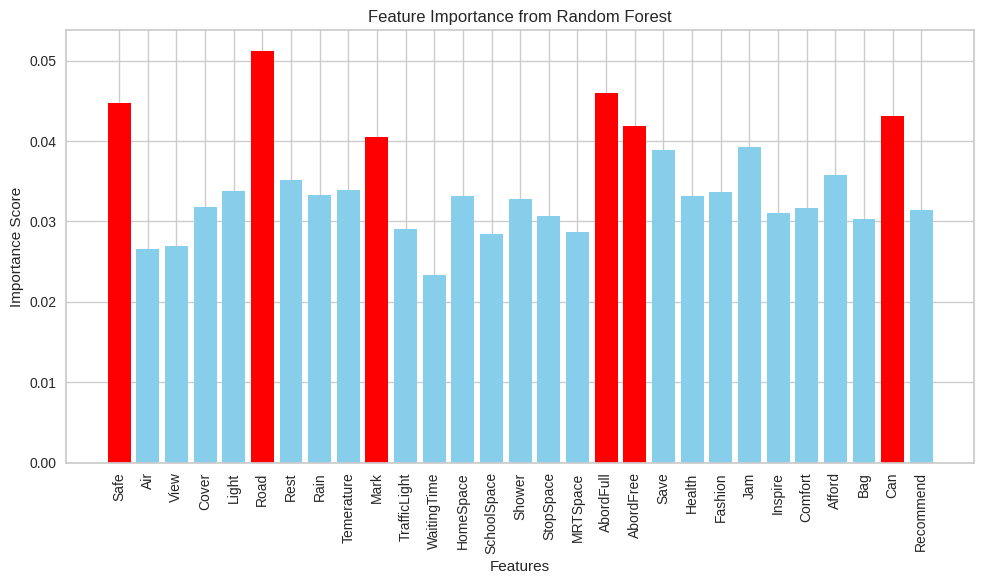

In [28]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# 假設您已有 X 和 y 數據

# 初始化隨機森林模型
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 訓練模型
rf_model.fit(X, y)

# 獲取特徵的重要性
feature_importances = rf_model.feature_importances_

# 查看特徵的重要性
feature_names = X.columns
importance_dict = dict(zip(feature_names, feature_importances))
print("特徵的重要性：", importance_dict)

# 可視化特徵重要性
plt.figure(figsize=(10, 6))

# 設定顏色：高於 0.04 的變數為紅色，其餘為天藍色
threshold = 0.04
colors = ['red' if score > threshold else 'skyblue' for score in feature_importances]

# 繪製條形圖
bars = plt.bar(feature_names, feature_importances, color=colors)

# 使 x 軸標籤垂直顯示
plt.xticks(rotation=90, ha='center')

# 添加坐標軸標籤和標題
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance from Random Forest')

# 自動調整圖表邊距
plt.tight_layout()

# 顯示圖表
plt.show()
